In [ ]:
#Lab4
#help(len)
#help('def')
x = 17
dir(x) #dir returns all the properties and methods, including built-in properties default for all objects



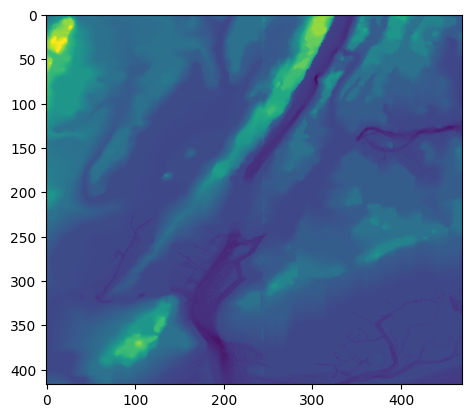

In [12]:
import numpy as np
import matplotlib.pyplot as plt


#Read in the data to an array, called elevations:
elevations = np.loadtxt("./lab4/elevationsNYC.txt") #.. = relative one directory up
#Load the array into matplotlib.pyplot:
plt.imshow(elevations)
#Display the plot:
plt.show()


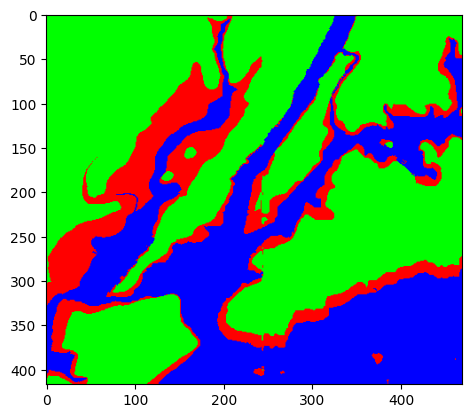

In [13]:
#Take the shape (dimensions) of the elevations
#  and add another dimension to hold the 3 color channels:
mapShape = elevations.shape + (3,)

#Create a blank image that's all zeros:
floodMap = np.zeros(mapShape)

for row in range(mapShape[0]):
    for col in range(mapShape[1]):
        if elevations[row,col] <= 0:
            #Below sea level
           floodMap[row,col,2] = 1.0     #Set the blue channel to 100%
        elif elevations[row,col] <= 6:
            #Below the storm surge of Hurricane Sandy (flooding likely)
           floodMap[row,col,0] = 1.0     #Set the red channel to 100%
        else:
            #Above the 6 foot storm surge and didn't flood
            floodMap[row,col,1] = 1.0   #Set the green channel to 100%

#Load the flood map image into matplotlib.pyplot:
plt.imshow(floodMap)

#Display the plot:
plt.show()

#Save the image:
plt.imsave('floodMap.png', floodMap)

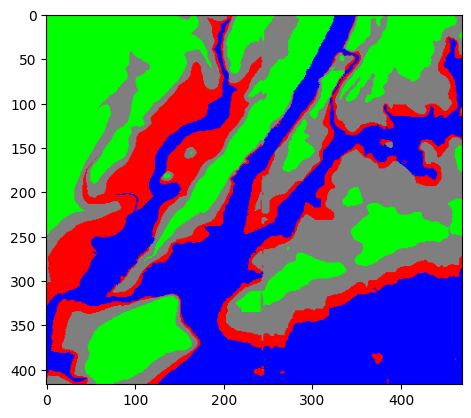

In [20]:
#Namely, modify your program to color the region just above the Sandy storm surge (6 feet) 
#and less than or equal to 20 feet the color grey (50% red, 50% green, 50% blue).

#Create a blank image that's all zeros:
floodMap1 = np.zeros(mapShape)

for row in range(mapShape[0]):
    for col in range(mapShape[1]):
        if elevations[row,col] <= 0: #less than 0
            #Below sea level
           floodMap1[row,col,2] = 1.0     #Set the blue channel to 100%
        elif elevations[row, col] <= 6:
            # Below the storm surge of Hurricane Sandy (flooding likely)
            floodMap1[row, col, 0] = 1.0  # Set the red channel to 100%
        elif elevations[row, col] > 6 and elevations[row, col] <= 20:
            # Between 6 and 20 feet, color it grey (50% red, green, and blue)
            floodMap1[row, col, :] = 0.5  # The : is the same as range(3)
        else:
            # Above the 20 feet mark (assumed to be not flooding)
            floodMap1[row, col, 1] = 1.0  # Set the green channel to 100%

#Load the flood map image into matplotlib.pyplot:
plt.imshow(floodMap1)

#Display the plot:
plt.show()

#Save the image:
#plt.imsave('floodMap1.png', floodMap1)

In [25]:

#help(floodMap1)
help(plt.imsave)

Help on function imsave in module matplotlib.pyplot:

imsave(fname: 'str | os.PathLike | BinaryIO', arr: 'ArrayLike', **kwargs) -> 'None'
    Colormap and save an array as an image file.

    RGB(A) images are passed through.  Single channel images will be
    colormapped according to *cmap* and *norm*.

    .. note::

       If you want to save a single channel image as gray scale please use an
       image I/O library (such as pillow, tifffile, or imageio) directly.

    Parameters
    ----------
    fname : str or path-like or file-like
        A path or a file-like object to store the image in.
        If *format* is not set, then the output format is inferred from the
        extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
        If *format* is set, it determines the output format.
    arr : array-like
        The image data. The shape can be one of
        MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
    vmin, vmax : float, optional
        *vmin* and *vm